In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [44]:
from sklearn.ensemble import RandomForestRegressor 
import statsmodels.api as sm


In [45]:
data = pd.read_excel('jogo.xlsx') 
data_ = data.fillna(0)

In [46]:
df = pd.DataFrame(data_)

In [47]:
deletar = df.loc[((df.Global_Sales) == 0) & ((df.Total_Shipped) == 0)]
a = deletar.index
dados = df.drop(a)

In [48]:
dados["Sales"] = df["Global_Sales"] + df["Total_Shipped"]

In [49]:
df_ = dados.loc[((dados.Critic_Score !=0) & ((dados.Sales != 0)))]

In [50]:
xc = df_.iloc[:,9].values
yc = df_.iloc[:,11].values

In [51]:
xc = pd.DataFrame(xc)
yc = pd.DataFrame(yc)

In [52]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [53]:
regressor.fit(xc, yc) 

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

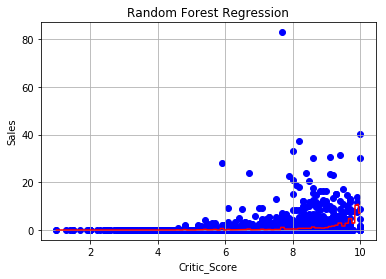

In [54]:


# Visualising the Random Forest Regression results 
  
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
X_grid = np.arange(min(xc.values), max(xc.values), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data 
plt.scatter(xc.values, yc.values, color = 'blue')   
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid),  
         color = 'red')  
plt.title('Random Forest Regression') 
plt.xlabel('Critic_Score') 
plt.ylabel('Sales') 
plt.grid(True)
plt.show()

In [62]:
regressor.predict([[7]])

array([0.13315522])

In [63]:
comparador = df_.loc[df_.Critic_Score == 7]

In [64]:
comparador.Sales.mean()

0.6320379146919431